# Homework 4
Deadline: 2nd February 23:59, delivered to your tutor.





# Exercise: Understanding Independence and Correlation

## Background Information

1. **Independence of Random Variables**  
   Two random variables $X$ and $Y$ are said to be independent if the occurrence of one does not affect the probability of the other. Mathematically, this means:  
   $$
   P(X \leq x, Y \leq y) = P(X \leq x)P(Y \leq y) \quad \text{for all } x, y.
   $$
   Equivalently, their joint probability density function (pdf) or mass function can be written as the product of their marginal pdfs or mass functions:  
   $$
   f_{X,Y}(x, y) = f_X(x)f_Y(y).
   $$

2. **Correlation**  
   The correlation between two random variables $X$ and $Y$ is a measure of their linear relationship, defined as:  
   $$
   \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}.
   $$
   Here, $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\text{Var}(X)$ and $\text{Var}(Y)$ are their variances. If $\rho(X, Y) = 0$, it means there is no linear relationship between $X$ and $Y$, but they may still be dependent.

---

## Task 1a (0.5p)

   Find a specific example of two random variables $X$ and $Y$ such that:
   - $X$ and $Y$ are dependent.
   - The correlation $\rho(X, Y)$ is equal to $0$.

Attach proof, either as markdown code, or photo.


## Task 1b (0.5p)

You are given data file `data.csv`.
- Load the data and do the pairplots of features and target, what can you observe?
- Compute the correlations and plot, the correlation matrix, what can you conclude?
- Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

**Write your answers clearly!**

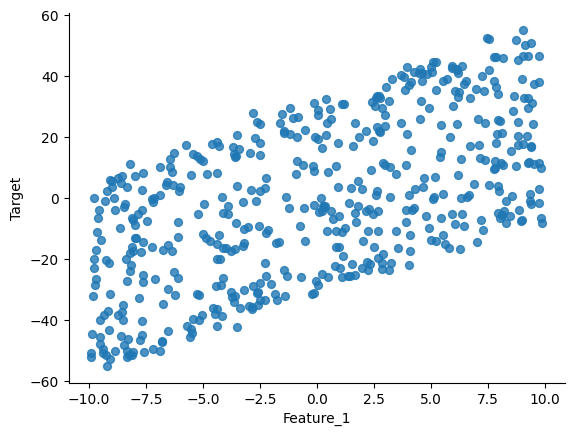

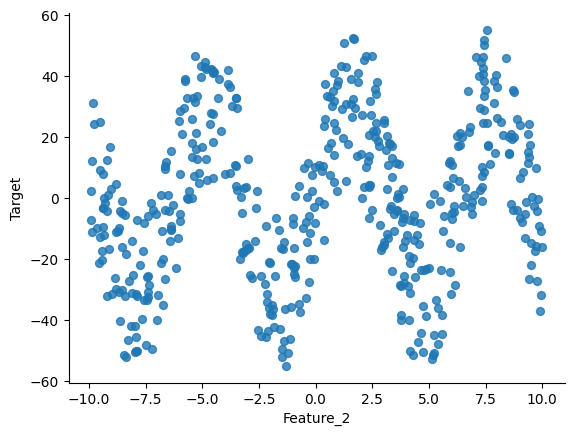

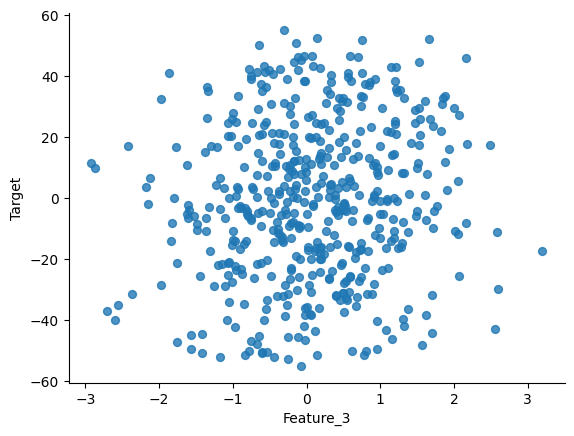

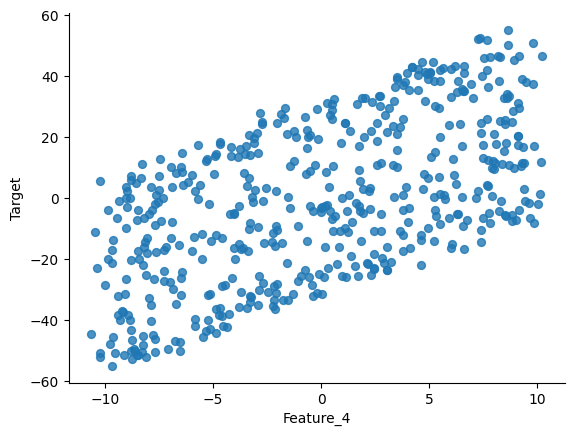

In [ ]:
# @title Features vs Target

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Feature_1', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_2', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_3', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_4', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


           Feature_1  Feature_2  Feature_3  Feature_4    Target
Feature_1   1.000000   0.044031   0.038552   0.996672  0.600176
Feature_2   0.044031   1.000000  -0.022952   0.042055  0.179238
Feature_3   0.038552  -0.022952   1.000000   0.038521  0.111958
Feature_4   0.996672   0.042055   0.038521   1.000000  0.593566
Target      0.600176   0.179238   0.111958   0.593566  1.000000


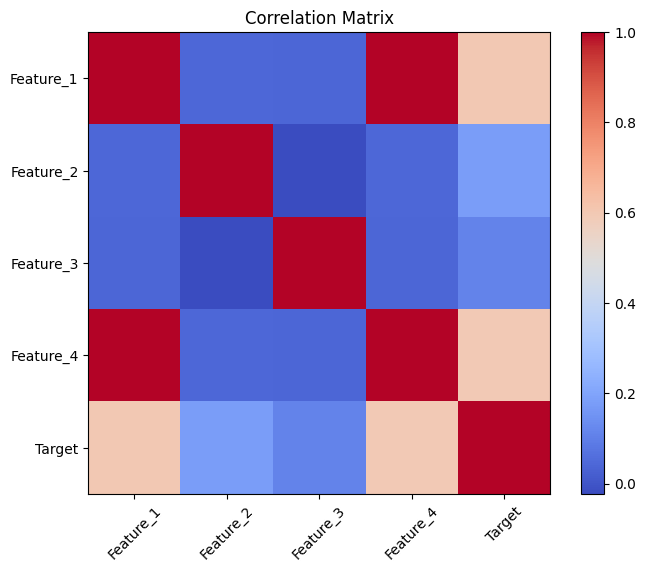

In [ ]:
# prompt: correlations of random features with target

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# ... (Your existing code) ...

# Calculate correlations
correlations = data.corr()

# Print the correlation matrix
print(correlations)

# Visualize the correlations (optional)
plt.figure(figsize=(8, 6))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=45)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Matrix')
plt.show()

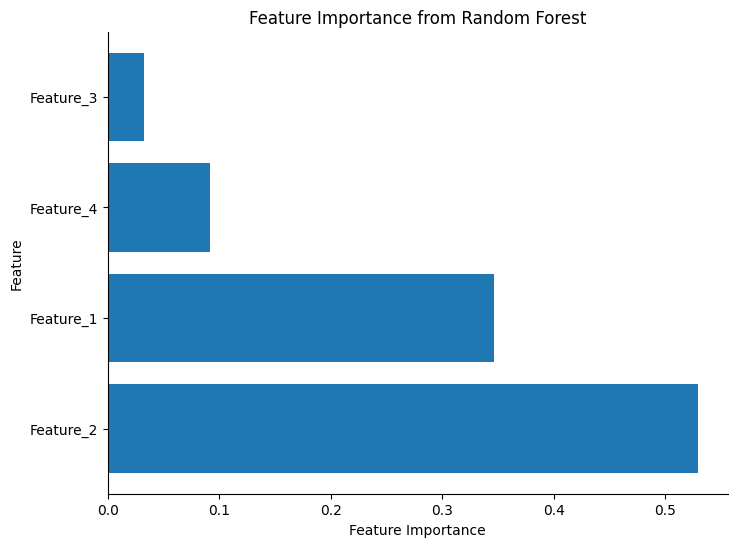

In [ ]:
# prompt: do the same plot as above but ionstead of correlation use feature importance from random forest

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# ... (Your existing code) ...

# Calculate feature importances using RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(data.drop("Target", axis=1), data["Target"])
importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': data.drop("Target", axis=1).columns,
                             'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# Problem 2

Consider any dataset $X \in \mathbb{R}_n^d$, where $d$ is the number of columns, and $n$ is the number of samples. Let $\sum_{i=1}^d \mathcal{D}^2 X^i$ be the sum of variances of all the columns. Let $X_{pca} \in \mathbb{R}_n^d$ be the PCA transformed $X$ dataset. Show that $\sum_{i=1}^d \mathcal{D}^2 X^i = \sum_{i=1}^d \mathcal{D}^2 X_{pca}^i$.

Write the proof of this fact below. You can either do it in LaTeX, or you can write it in a reasonably elegant way on a piece of paper and paste an image here.

# **Problem 3 (1p)**

In this problem you will use algorithm from Online Learning and Boosting, called Multiplicative Weights Update https://www.cs.princeton.edu/~arora/pubs/MWsurvey.pdf to solve the following optimization problem.

## Problem Definition
- **Input**:
  - Universe $U = \{1, 2, \dots, n\}$
  - Sets $\mathcal{S} = \{S_1, \dots, S_m\},\ S_i \subseteq U$
- **Goal**: Find smallest $\mathcal{C} \subseteq \mathcal{S}$ covering $U$

## Algorithm

**Initialize weights**:
   $$
   w_u^{(1)} = 1 \quad \forall u \in U
   $$

**Repeat until all elements covered**:
1. **Choose set** $S_i$ with probability:
   $$
   \mathbb{P}[S_i] = \frac{\sum_{u \in S_i} w_u^{(t)}}{\sum_{j=1}^m \sum_{u \in S_j} w_u^{(t)}}
   $$

2. **Add** $S_i$ to solution $\mathcal{C}$

3. **Update weights** for uncovered $u \in S_i$:
   $$
   w_u^{(t+1)} = \frac{1}{2}w_u^{(t)}
   $$

## Task
1. Show that the total number of rounds (the number of sets the algorithm returns) is on expectation at most O(\log n) worse than the optimum number of sets needed:
   $$
   \mathbb{E}[T] \leq 2\text{OPT}\ln n
   $$

